---
---

### **Project Overview**
- **Objective:**
    - The goal of this project is to forecast stock prices using advanced deep learning techniques, specifically a **TimeGAN** (Time-series Generative Adversarial Network), to generate synthetic stock data.
    - By training a **predictive model** on this synthetic data, we aim to predict future stock prices, leveraging the power of **LSTM** networks for sequence prediction.
  
- **Approach:**
    1. **Data Collection:** Stock data is fetched using the **`yfinance`** library, and only the 'Close' price is used for modeling.
    2. **Data Inspection:** The dataset is analyzed for quality by checking for missing values, duplicates, and its statistical properties.
    3. **Data Normalization:** The stock data is normalized using **MinMaxScaler** to scale the stock prices between 0 and 1 for better model training.
    4. **TimeGAN Architecture:** The TimeGAN model is implemented with separate components for **Generator**, **Discriminator**, **Embedder**, and **Recovery**, trained using synthetic data generated by the GAN.
    5. **Predictive Model:** A predictive model is built and trained using synthetic data, and it is used to predict future stock prices.
    6. **Evaluation & Visualization:** The model’s performance is evaluated using **Mean Squared Error (MSE)**, and the results are compared with real stock data.

- **Outcome:**
    - The final model provides synthetic stock data generation and price predictions for future stock movements.

---

### **Conclusion**
- **Results:**
    - The TimeGAN model successfully generated synthetic stock data, capturing the underlying patterns of stock price movements.
    - The predictive model, trained on the synthetic data, provided reasonable predictions with a **Mean Squared Error (MSE)** score that can be further optimized.
  
- **Impact:**
    - This approach demonstrates the power of **Generative Adversarial Networks** (GANs) in financial modeling, particularly in generating data where historical data might be scarce or limited.
    - The use of synthetic data for training predictive models allows for experimentation and model testing without the need for extensive real-world data.

- **Future Work:**
    - The model can be expanded to include multiple stock features (e.g., volume, open, close) and trained with more sophisticated architectures to improve prediction accuracy.
    - Further work could also include applying the model to other financial markets or integrating real-time data for live stock price prediction.

----

In [1]:
# Suppress warnings to keep the notebook clean

In [2]:
import warnings  # Import warnings module to suppress unnecessary warnings

In [3]:
warnings.filterwarnings('ignore')  # Suppress all warnings in the notebook

---

In [4]:
# Import the working libraries

In [5]:
import yfinance as yf  # For downloading stock data

In [6]:
import pandas as pd  # For data manipulation

In [7]:
import numpy as np  # For numerical operations

In [8]:
from sklearn.preprocessing import MinMaxScaler  # For data normalization

In [9]:
from sklearn.metrics import mean_squared_error  # For evaluating model performance


In [10]:
import tensorflow as tf  # For deep learning models

In [11]:
from tensorflow.keras.models import Model  # To create models

In [12]:
from tensorflow.keras.layers import Input, LSTM, Dense  # Layers for building neural networks


In [13]:
import matplotlib.pyplot as plt  # For plotting data

In [14]:
import seaborn as sns  # For creating statistical plots

---

---

# Step 1: Download Stock Data
- **Objective:** Download historical stock data for a given ticker symbol.
- **Key Steps:**
  - Use `yfinance` to fetch stock data within a specified date range.
  - Clean the data by retaining only the 'Close' prices.
  - Normalize the 'Close' prices using `MinMaxScaler` for better model performance.

In [15]:
def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)  # Fetch stock data for given dates
    return data[['Close']].dropna()  # Only keep 'Close' column and remove missing values


In [16]:
# Example: Fetch Apple stock data from January 2022 to January 2023

In [17]:
ticker = "AAPL"  # Ticker symbol for Apple stock

In [18]:
start_date = "2022-01-01"  # Start date for data download

In [19]:
end_date = "2023-01-01"  # End date for data download

In [20]:
stock_data = download_stock_data(ticker, start_date, end_date)  # Fetch and clean data


[*********************100%***********************]  1 of 1 completed


In [21]:
scaler = MinMaxScaler()  # Initialize the MinMaxScaler to normalize the data


In [22]:
stock_data['Close'] = scaler.fit_transform(stock_data[['Close']])  # Normalize 'Close' column


In [23]:
print("Stock data loaded and normalized.")  # Confirm data loading and normalization


Stock data loaded and normalized.


---

----

# Step 2: Inspect the Dataset
- **Objective:** Understand the structure and quality of the dataset.
- **Key Steps:**
  - **Head:** Display the first few rows of data.
  - **Describe:** Show statistical summary of the dataset.
  - **Info:** Check dataset information including data types and missing values.
  - **Missing Values:** Identify and handle any missing values.
  - **Duplicates:** Check and remove duplicate rows.
  - **Visualizations:**
    - **Histogram:** View the distribution of stock prices.
    - **Correlation Matrix:** Understand relationships between features (if applicable).
    - **Scatter Plot:** Visualize trends over time.

In [24]:
# Print the first few rows of the dataset to understand its structure

In [25]:
print(stock_data.head())  # Show the first 5 rows to get a snapshot of the dataset


Price                         Close
Ticker                         AAPL
Date                               
2022-01-03 00:00:00+00:00  1.000000
2022-01-04 00:00:00+00:00  0.958728
2022-01-05 00:00:00+00:00  0.873325
2022-01-06 00:00:00+00:00  0.821154
2022-01-07 00:00:00+00:00  0.824192


In [26]:
# Display descriptive statistics (mean, std, min, 25%, 50%, 75%, max) to understand data distribution


In [27]:
print(stock_data.describe())  # Show statistical summary for numerical columns


Price        Close
Ticker        AAPL
count   251.000000
mean      0.514473
std       0.233269
min       0.000000
25%       0.332410
50%       0.501161
75%       0.712435
max       1.000000


In [28]:
# Display info about the dataset (columns, non-null counts, and data types)


In [29]:
print(stock_data.info())  # Show dataset info including datatypes and missing values


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None


In [30]:
# Check for missing values in the dataset

In [31]:
print(stock_data.isnull().sum())  # Check for missing values in the data

Price  Ticker
Close  AAPL      0
dtype: int64


In [32]:
# Check for duplicate rows in the dataset

In [33]:
print(stock_data.duplicated().sum())  # Check if any duplicate rows exist

9


In [34]:
# Plot histogram to understand the distribution of stock prices

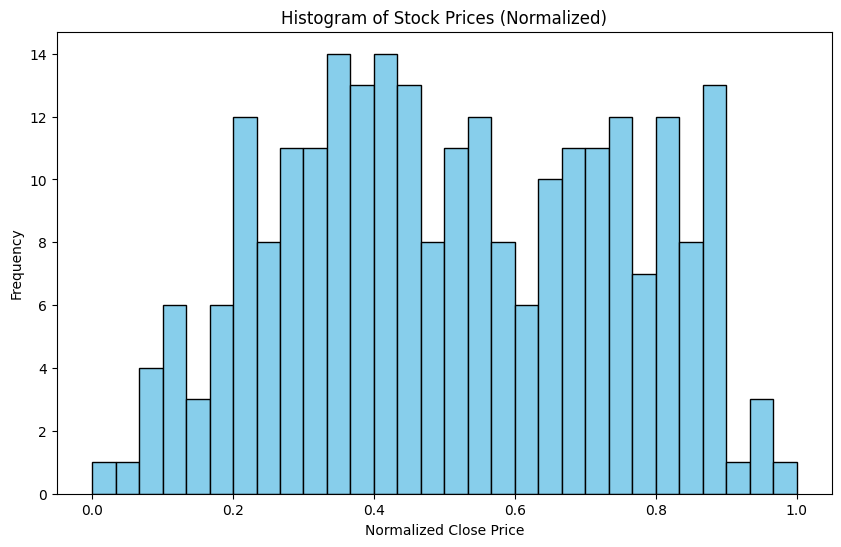

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Close'], bins=30, edgecolor='k', color='skyblue')  # Histogram of stock prices
plt.title("Histogram of Stock Prices (Normalized)")  # Title for the histogram
plt.xlabel("Normalized Close Price")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.show()  # Show the histogram plot

In [36]:
# Plot correlation matrix (useful when you have more features)

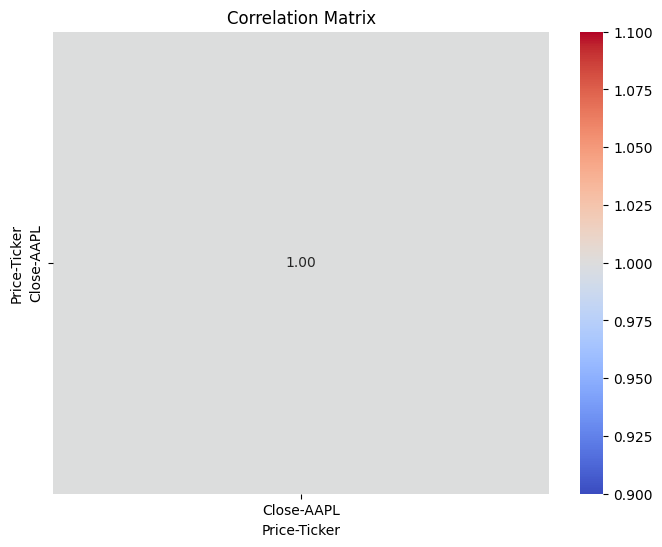

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Heatmap to show correlation
plt.title("Correlation Matrix")  # Title for the correlation matrix
plt.show()  # Show the correlation plot

In [38]:
# Scatter plot to visualize trends over time

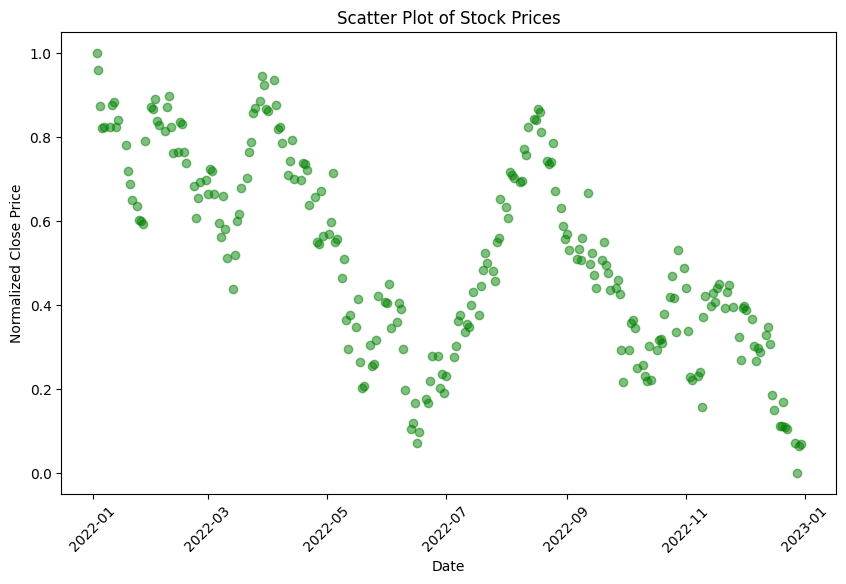

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(stock_data.index, stock_data['Close'], alpha=0.5, color='green')  # Scatter plot of stock prices
plt.title("Scatter Plot of Stock Prices")  # Title for the scatter plot
plt.xlabel("Date")  # X-axis label
plt.ylabel("Normalized Close Price")  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show the scatter plot

In [40]:
# Use a small subset of data for simplicity (uncomment to use entire dataset)


In [41]:
# subset = stock_data[:50]  # Use first 50 rows for training

In [42]:
# real_data = subset['Close'].values.reshape(-1, 1)  # Reshape data into proper format for training


In [43]:
# Using the entire dataset instead of a small subset

In [44]:
real_data = stock_data['Close'].values.reshape(-1, 1)  # Use all data (entire dataset) for training


---

---

# Step 3: Define TimeGAN Architecture
- **Objective:** Define the TimeGAN model for generating synthetic stock data.
- **Key Components:**
  - **Generator:** Generates synthetic data from latent noise.
  - **Discriminator:** Distinguishes between real and generated data.
  - **Embedder:** Encodes real data into latent space.
  - **Recovery:** Recovers the original data from latent space.
  - **Autoencoder:** Used for pretraining before GAN training.

In [45]:
def build_timegan(input_dim, seq_length, latent_dim):
    # Generator network
    generator_input = Input(shape=(seq_length, latent_dim))  # Input layer for generator
    generator_lstm = LSTM(50, activation="relu", return_sequences=True)(generator_input)  # LSTM layer for generator
    generator_output = Dense(input_dim)(generator_lstm)  # Dense layer to generate data
    generator = Model(generator_input, generator_output, name="Generator")  # Create the generator model

    # Discriminator network
    discriminator_input = Input(shape=(seq_length, input_dim))  # Input layer for discriminator
    discriminator_lstm = LSTM(50, activation="relu", return_sequences=False)(discriminator_input)  # LSTM layer for discriminator
    discriminator_output = Dense(1, activation="sigmoid")(discriminator_lstm)  # Sigmoid output for binary classification
    discriminator = Model(discriminator_input, discriminator_output, name="Discriminator")  # Create the discriminator model

    # Embedding network
    embedder_input = Input(shape=(seq_length, input_dim))  # Input layer for embedding
    embedder_lstm = LSTM(50, activation="relu", return_sequences=True)(embedder_input)  # LSTM layer for embedding
    embedder_output = Dense(latent_dim)(embedder_lstm)  # Dense layer for embedding
    embedder = Model(embedder_input, embedder_output, name="Embedder")  # Create the embedder model

    # Recovery network
    recovery_input = Input(shape=(seq_length, latent_dim))  # Input layer for recovery
    recovery_lstm = LSTM(50, activation="relu", return_sequences=True)(recovery_input)  # LSTM layer for recovery
    recovery_output = Dense(input_dim)(recovery_lstm)  # Dense layer to recover original data
    recovery = Model(recovery_input, recovery_output, name="Recovery")  # Create the recovery model

    # Autoencoder for pretraining
    autoencoder_input = Input(shape=(seq_length, input_dim))  # Input layer for autoencoder
    latent_repr = embedder(autoencoder_input)  # Embedding step
    recovered_data = recovery(latent_repr)  # Recovery step
    autoencoder = Model(autoencoder_input, recovered_data, name="Autoencoder")  # Define the autoencoder model

    return generator, discriminator, embedder, recovery, autoencoder  # Return all components of TimeGAN


In [46]:
# Initialize the TimeGAN components with sequence length, latent dimension, and input dimension


In [47]:
seq_length = 5  # Sequence length for training data

In [48]:
latent_dim = 10  # Latent dimension for data representation

In [49]:
input_dim = 1  # Dimensionality of input data (1 feature: stock price)

In [50]:
generator, discriminator, embedder, recovery, autoencoder = build_timegan(input_dim, seq_length, latent_dim)  # Initialize models


In [51]:
# Compile the models with appropriate optimizers and loss functions

In [52]:
discriminator.compile(optimizer='adam', loss='binary_crossentropy')  # Compile discriminator


In [53]:
autoencoder.compile(optimizer='adam', loss='mse')  # Compile autoencoder

---

---

# Step 4: Prepare Data for TimeGAN
- **Objective:** Create overlapping sequences from the stock price data for TimeGAN training.
- **Key Steps:**
  - Prepare sequences of data points with a specified sequence length (e.g., 5 days).
  - These sequences will be used to teach the model temporal dependencies in the stock prices.

In [54]:
def prepare_sequences(data, seq_length):
    # Create overlapping sequences of length seq_length from the data
    return np.array([data[i:i+seq_length] for i in range(len(data) - seq_length)])


In [55]:
train_data = prepare_sequences(real_data, seq_length)  # Prepare training data sequences


----

---

# Step 5: Train TimeGAN with Fewer Epochs
- **Objective:** Train the TimeGAN model with a focus on real and fake data generation.
- **Key Phases:**
  - **Pretraining Autoencoder:** Initially train the autoencoder to learn data representations.
  - **GAN Training:** Train the discriminator and generator simultaneously to improve synthetic data quality.
  - **Optimization:** Use adversarial loss to optimize the models.

In [56]:
# 1. Pretrain Autoencoder

In [57]:
autoencoder.fit(train_data, train_data, epochs=50, batch_size=16, verbose=0)  # Pretrain autoencoder (50 epochs)


In [58]:
print("Autoencoder pretraining complete.")  # Confirm pretraining completion


Autoencoder pretraining complete.


In [59]:
# 2. Train GAN with fewer epochs

In [60]:
epochs = 200  # Number of training epochs for GAN

In [61]:
batch_size = 16  # Batch size for training

In [62]:
for epoch in range(epochs):
    # Sample random real sequences from training data
    idx = np.random.randint(0, train_data.shape[0], batch_size)  # Random index selection
    real_sequences = train_data[idx]  # Real data sequences

    # Generate fake sequences from random noise
    noise = np.random.normal(0, 1, (batch_size, seq_length, latent_dim))  # Noise for generator
    fake_sequences = generator.predict(noise)  # Generate fake data sequences

    # Train discriminator with real and fake data
    d_loss_real = discriminator.train_on_batch(real_sequences, np.ones((batch_size, 1)))  # Train with real data
    d_loss_fake = discriminator.train_on_batch(fake_sequences, np.zeros((batch_size, 1)))  # Train with fake data
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # Average discriminator loss

    # Train generator using adversarial loss
    g_loss = discriminator.train_on_batch(fake_sequences, np.ones((batch_size, 1)))  # Generator loss

    if epoch % 50 == 0:  # Print progress every 50 epochs
        print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Epoch 0/200 | D Loss: 0.6756 | G Loss: 0.6852
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [63]:
print("TimeGAN training complete.")  # Confirm GAN training completion

TimeGAN training complete.


---

----

# Step 6: Generate Synthetic Data from Trained Generator
- **Objective:** Generate synthetic stock data using the trained generator.
- **Key Steps:**
  - Input random noise to the trained generator to create synthetic stock price data.
  - Reshape the generated data into the desired format for further use.

In [64]:
noise = np.random.normal(0, 1, (100, seq_length, latent_dim))  # Random noise for data generation


In [65]:
synthetic_data = generator.predict(noise)  # Generate synthetic data from noise


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


In [66]:
synthetic_data = synthetic_data.reshape(-1, input_dim)  # Reshape the generated data


---

---

# Step 7: Train Predictive Model Using Synthetic Data
- **Objective:** Use the synthetic data to train a predictive model.
- **Key Steps:**
  - Create sequences from the synthetic data for training the predictive model.
  - Train a model, such as LSTM, to predict future stock prices based on past data.

In [67]:
def create_sequences(data, time_steps):
    X, y = [], []  # Lists to store sequences and corresponding labels
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  # Create input sequences
        y.append(data[i+time_steps])  # Create output labels (next time step)
    return np.array(X), np.array(y)  # Return as numpy arrays


In [68]:
X_train, y_train = create_sequences(synthetic_data, seq_length)  # Create sequences for training


In [69]:
# Define and train the predictive model

In [70]:
predictive_model = tf.keras.Sequential([  # Sequential model with LSTM and Dense layers
    LSTM(50, activation='relu', input_shape=(seq_length, input_dim)),  # LSTM layer for sequence input
    Dense(1)  # Output layer to predict the next price
])

In [71]:
predictive_model.compile(optimizer='adam', loss='mse')  # Compile the model with Adam optimizer and MSE loss


In [72]:
predictive_model.fit(X_train, y_train, epochs=50, verbose=0)  # Train the model with synthetic data


In [73]:
print("Predictive model training complete.")  # Confirm model training completion


Predictive model training complete.


----

---

# Step 8: Evaluate Model on Real Data
- **Objective:** Assess the model's performance using real stock data.
- **Key Steps:**
  - Prepare sequences from real stock data.
  - Use the trained model to make predictions on real data.
  - Calculate the Mean Squared Error (MSE) to evaluate the accuracy of predictions.

In [74]:
X_real, y_real = create_sequences(real_data, seq_length)  # Prepare real data sequences for evaluation


In [75]:
predictions = predictive_model.predict(X_real)  # Make predictions on real data


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [76]:
mse = mean_squared_error(y_real, predictions)  # Calculate Mean Squared Error


In [77]:
print(f"Mean Squared Error on real data: {mse}")  # Print MSE

Mean Squared Error on real data: 0.20100431849719314


---

---

# Step 9: Save Predictions to a File
- **Objective:** Save the model's predictions for further analysis or reporting.
- **Key Steps:**
  - Convert predictions to a DataFrame.
  - Save the predictions in a CSV file for easy access and review.

In [78]:
predictions_df = pd.DataFrame(predictions, columns=["Predicted Close"])  # Convert predictions to DataFrame


In [79]:
predictions_df.to_csv("predicted_stock_prices.csv", index=False)  # Save predictions to CSV file


In [80]:
print("Predictions saved to 'predicted_stock_prices.csv'.")  # Confirm saving


Predictions saved to 'predicted_stock_prices.csv'.


----

---

# Step 10: Plot Results
- **Objective:** Visualize the model’s predictions alongside real stock prices.
- **Key Steps:**
  - Plot actual vs predicted stock prices.
  - Use a line plot to visually compare the trends in the data.

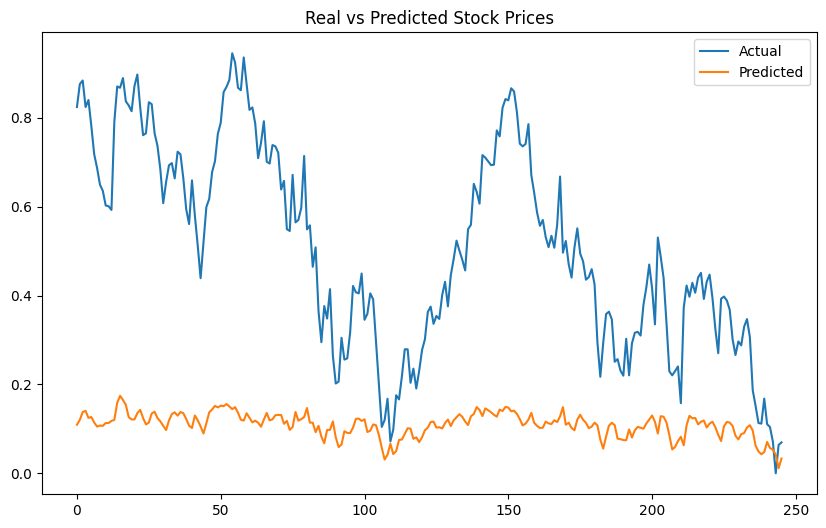

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(y_real, label="Actual")  # Plot actual stock prices
plt.plot(predictions, label="Predicted")  # Plot predicted stock prices
plt.legend()  # Show legend
plt.title("Real vs Predicted Stock Prices")  # Title for the plot
plt.show()  # Display the plot

---
---